### Notebook to calculate modified NDSI (MNDSI) for identifying snow in PlanetScope 4-band imagery
Rainey Aberle

December 2021

__To-Do:__
- crop image to AOI before computing area of snow

In [1]:
# Import packages
import os
import numpy as np
import geopandas as gpd
import fiona 
import rasterio as rio
from rasterio.mask import mask
from rasterio.plot import show
import earthpy.spatial as es
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import matplotlib.pyplot as plt
import glob

# base directory
basepath = '/Users/raineyaberle/Research/PhD/Wolverine/'
# image directory
impath = basepath+'imagery/Planet/2021-04-20_2021-08-25/SR-stitched/'
# output folder
outpath = basepath+'imagery/Planet/2021-04-20_2021-08-25/snow_areas/'

In [2]:
### Area of Interest (AOI) ###
# Read in shapefile with AOI polygon
fn = basepath+'GIS_data/wolverine_RGI.shp'
AOI = gpd.read_file(fn)
print('Original shapefile CRS:',AOI.crs)

# Reproject to imagery CRS if necessary
AOI = AOI.to_crs(32606)

# print information
print('Reprojected shapefile CRS: ',AOI.crs)
print('Shapefile bounds:',AOI.boundary)

Original shapefile CRS: epsg:4326
Reprojected shapefile CRS:  epsg:32606
Shapefile bounds: 0    MULTILINESTRING ((393342.531 6698475.452, 3933...
dtype: geometry


In [3]:
### Load images ###
os.chdir(impath) # change directory
im_names = glob.glob('*.tif') # load all .tif file names
im_names.sort() # sort file names by date
print(im_names)

['20210421.tif', '20210421_crop.tif', '20210423.tif', '20210423_crop.tif', '20210425.tif', '20210425_crop.tif', '20210426.tif', '20210426_crop.tif', '20210501.tif', '20210501_crop.tif', '20210517.tif', '20210517_crop.tif', '20210518.tif', '20210518_crop.tif', '20210605.tif', '20210605_crop.tif', '20210611.tif', '20210611_crop.tif', '20210612.tif', '20210612_crop.tif', '20210613.tif', '20210613_crop.tif', '20210615.tif', '20210615_crop.tif', '20210704.tif', '20210704_crop.tif', '20210715.tif', '20210715_crop.tif', '20210716.tif', '20210716_crop.tif', '20210718.tif', '20210718_crop.tif', '20210731.tif', '20210731_crop.tif', '20210802.tif', '20210802_crop.tif', '20210815.tif', '20210815_crop.tif', '20210821.tif', '20210821_crop.tif']


In [4]:
### Crop images to AOI ###

# loop through images
for im_name in im_names:
    
    # open image
    im = rio.open(im_name)    

    # extract date from image name
    date = im_name[0:8]
    
    # mask image pixels outside the AOI
    AOI_bb = [AOI.bounds]
    out_image, out_transform = mask(im, list(AOI.geometry), crop=True)
    out_meta = im.meta.copy()
    out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})
    with rio.open(date+'_crop.tif', "w", **out_meta) as dest:
        dest.write(out_image)
    
    print(date+'_crop.tif saved')

20210421_crop.tif saved
20210421_crop.tif saved
20210423_crop.tif saved
20210423_crop.tif saved
20210425_crop.tif saved
20210425_crop.tif saved
20210426_crop.tif saved
20210426_crop.tif saved
20210501_crop.tif saved
20210501_crop.tif saved
20210517_crop.tif saved
20210517_crop.tif saved
20210518_crop.tif saved
20210518_crop.tif saved
20210605_crop.tif saved
20210605_crop.tif saved
20210611_crop.tif saved
20210611_crop.tif saved
20210612_crop.tif saved
20210612_crop.tif saved
20210613_crop.tif saved
20210613_crop.tif saved
20210615_crop.tif saved
20210615_crop.tif saved
20210704_crop.tif saved
20210704_crop.tif saved
20210715_crop.tif saved
20210715_crop.tif saved
20210716_crop.tif saved
20210716_crop.tif saved
20210718_crop.tif saved
20210718_crop.tif saved
20210731_crop.tif saved
20210731_crop.tif saved
20210802_crop.tif saved
20210802_crop.tif saved
20210815_crop.tif saved
20210815_crop.tif saved
20210821_crop.tif saved
20210821_crop.tif saved


/Users/raineyaberle/opt/anaconda3/envs/skysat_stereo/planet-snow/lib/python3.8/site-packages/earthpy/spatial.py:105: RuntimeWarning: invalid value encountered in true_divide
  n_diff = (b1 - b2) / (b1 + b2)


Area of snow =  1653.2046  km^2


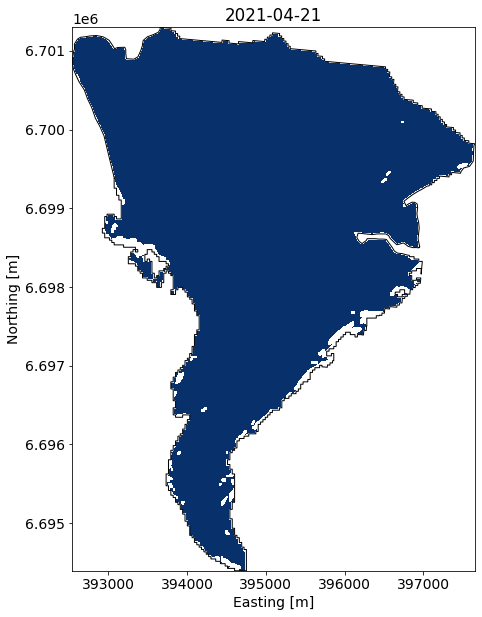

/Users/raineyaberle/opt/anaconda3/envs/skysat_stereo/planet-snow/lib/python3.8/site-packages/earthpy/spatial.py:105: RuntimeWarning: invalid value encountered in true_divide
  n_diff = (b1 - b2) / (b1 + b2)


Area of snow =  1647.5004  km^2


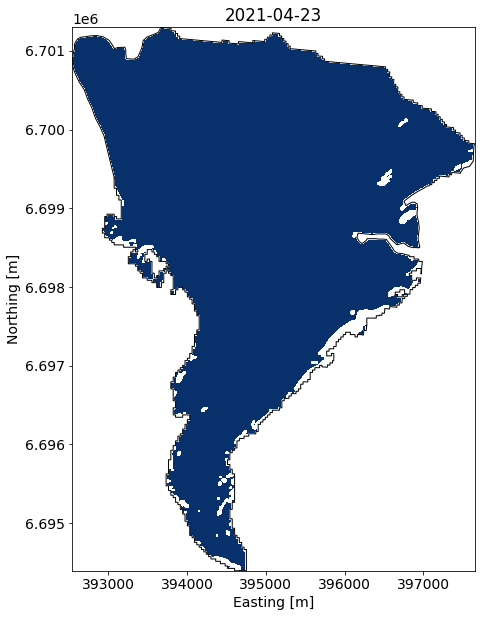

/Users/raineyaberle/opt/anaconda3/envs/skysat_stereo/planet-snow/lib/python3.8/site-packages/earthpy/spatial.py:105: RuntimeWarning: invalid value encountered in true_divide
  n_diff = (b1 - b2) / (b1 + b2)


Area of snow =  1648.1574  km^2


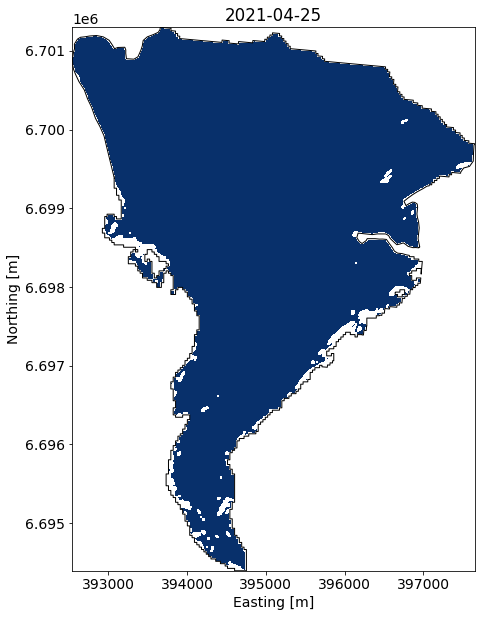

/Users/raineyaberle/opt/anaconda3/envs/skysat_stereo/planet-snow/lib/python3.8/site-packages/earthpy/spatial.py:105: RuntimeWarning: invalid value encountered in true_divide
  n_diff = (b1 - b2) / (b1 + b2)


Area of snow =  1641.6081  km^2


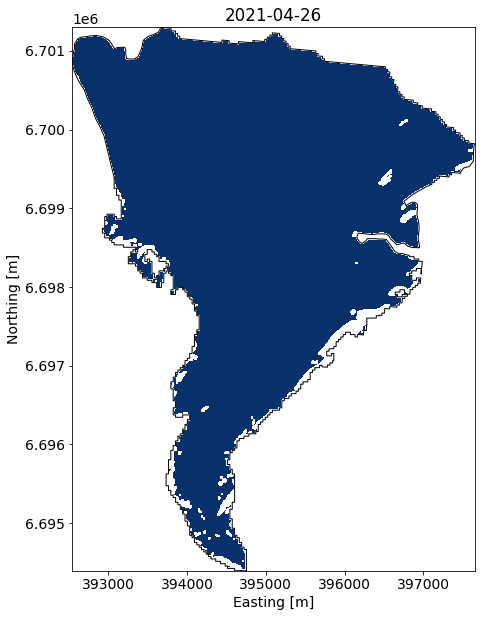

/Users/raineyaberle/opt/anaconda3/envs/skysat_stereo/planet-snow/lib/python3.8/site-packages/earthpy/spatial.py:105: RuntimeWarning: invalid value encountered in true_divide
  n_diff = (b1 - b2) / (b1 + b2)


Area of snow =  1656.342  km^2


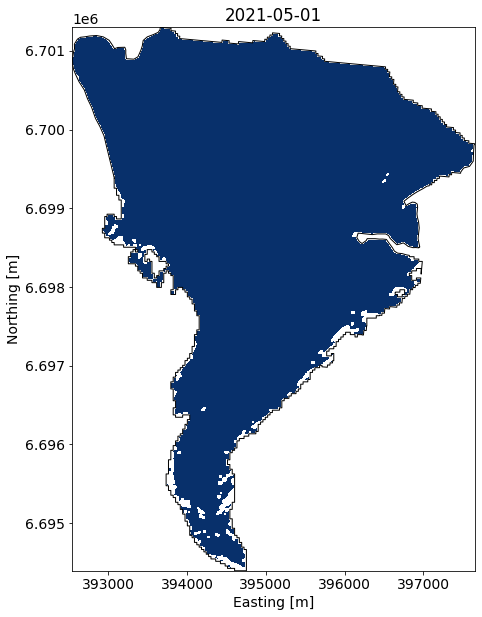

/Users/raineyaberle/opt/anaconda3/envs/skysat_stereo/planet-snow/lib/python3.8/site-packages/earthpy/spatial.py:105: RuntimeWarning: invalid value encountered in true_divide
  n_diff = (b1 - b2) / (b1 + b2)


Area of snow =  1630.2339  km^2


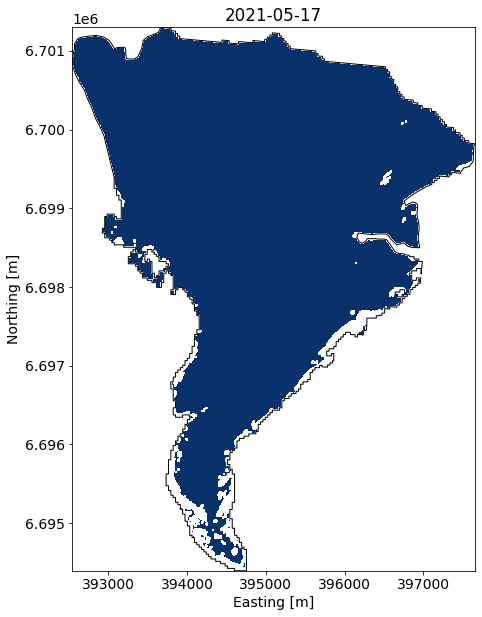

/Users/raineyaberle/opt/anaconda3/envs/skysat_stereo/planet-snow/lib/python3.8/site-packages/earthpy/spatial.py:105: RuntimeWarning: invalid value encountered in true_divide
  n_diff = (b1 - b2) / (b1 + b2)


Area of snow =  1611.2619  km^2


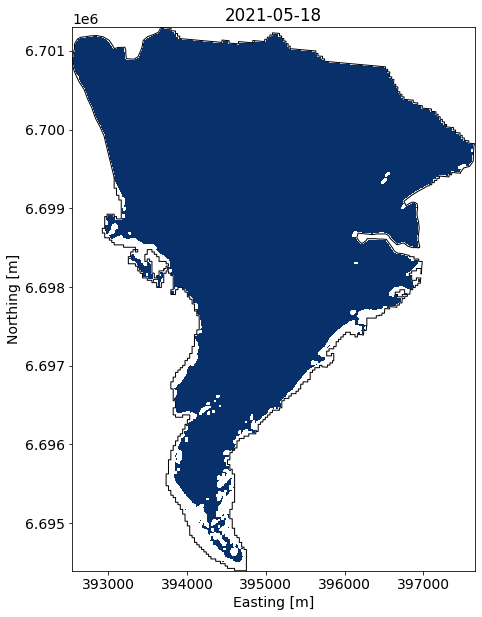

/Users/raineyaberle/opt/anaconda3/envs/skysat_stereo/planet-snow/lib/python3.8/site-packages/earthpy/spatial.py:105: RuntimeWarning: invalid value encountered in true_divide
  n_diff = (b1 - b2) / (b1 + b2)


Area of snow =  1592.5716  km^2


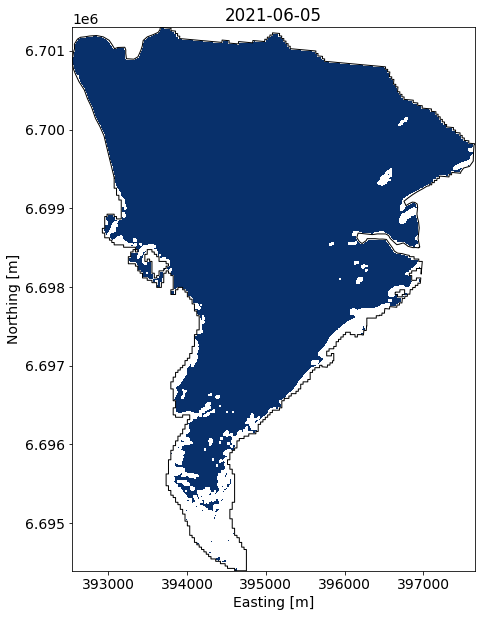

/Users/raineyaberle/opt/anaconda3/envs/skysat_stereo/planet-snow/lib/python3.8/site-packages/earthpy/spatial.py:105: RuntimeWarning: invalid value encountered in true_divide
  n_diff = (b1 - b2) / (b1 + b2)


Area of snow =  1480.0887  km^2


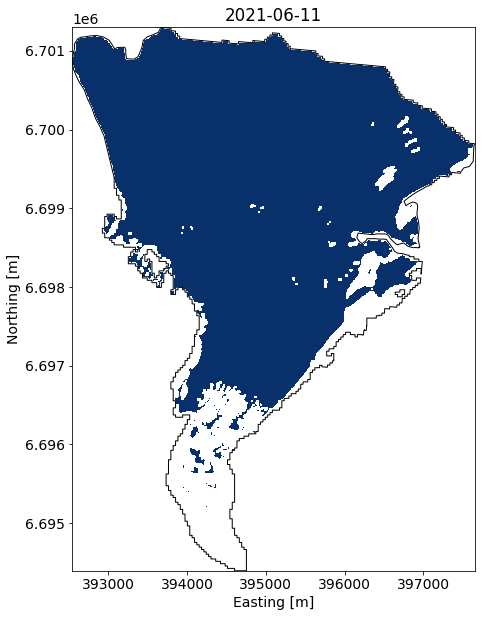

/Users/raineyaberle/opt/anaconda3/envs/skysat_stereo/planet-snow/lib/python3.8/site-packages/earthpy/spatial.py:105: RuntimeWarning: invalid value encountered in true_divide
  n_diff = (b1 - b2) / (b1 + b2)


Area of snow =  1517.589  km^2


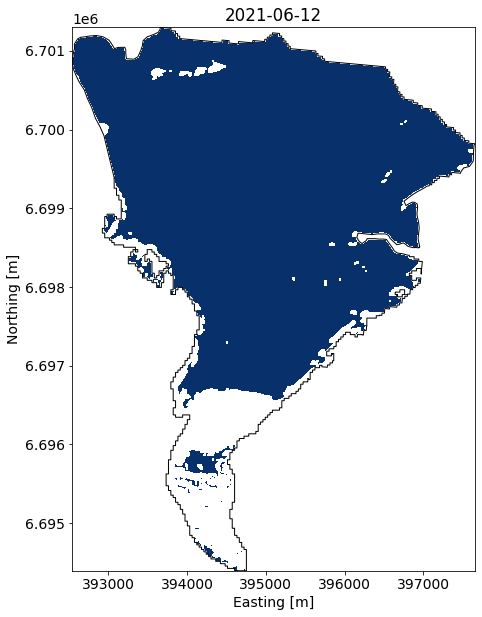

/Users/raineyaberle/opt/anaconda3/envs/skysat_stereo/planet-snow/lib/python3.8/site-packages/earthpy/spatial.py:105: RuntimeWarning: invalid value encountered in true_divide
  n_diff = (b1 - b2) / (b1 + b2)


Area of snow =  1559.0493  km^2


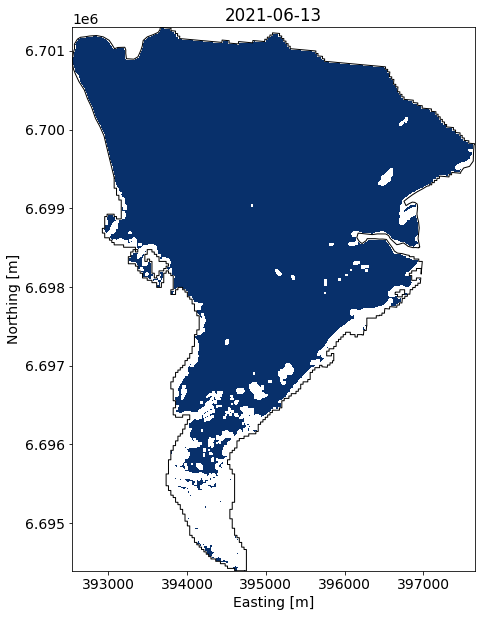

/Users/raineyaberle/opt/anaconda3/envs/skysat_stereo/planet-snow/lib/python3.8/site-packages/earthpy/spatial.py:105: RuntimeWarning: invalid value encountered in true_divide
  n_diff = (b1 - b2) / (b1 + b2)


Area of snow =  1564.2504  km^2


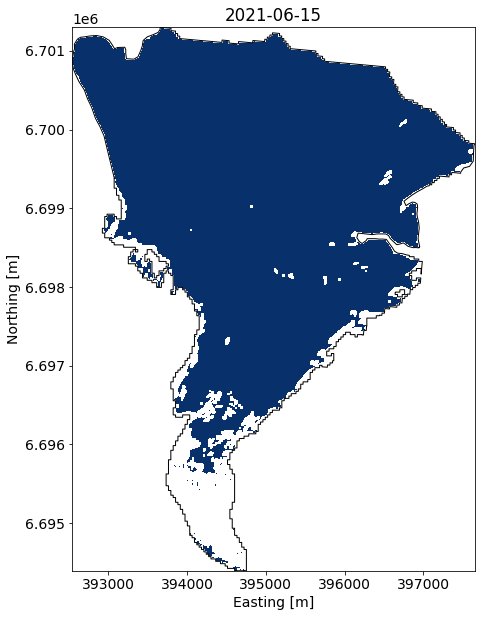

/Users/raineyaberle/opt/anaconda3/envs/skysat_stereo/planet-snow/lib/python3.8/site-packages/earthpy/spatial.py:105: RuntimeWarning: invalid value encountered in true_divide
  n_diff = (b1 - b2) / (b1 + b2)


Area of snow =  1434.3561  km^2


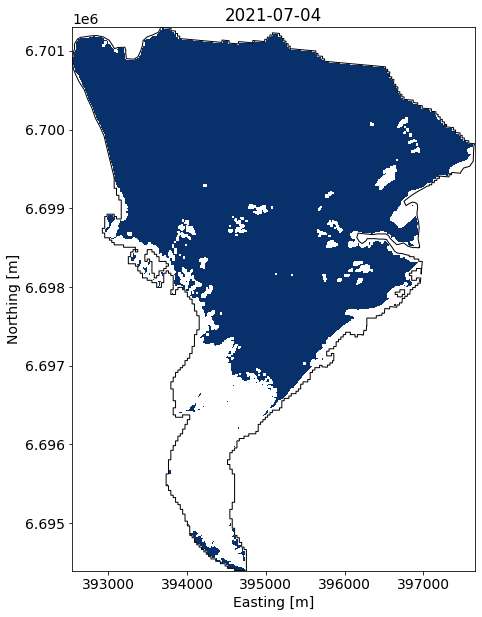

/Users/raineyaberle/opt/anaconda3/envs/skysat_stereo/planet-snow/lib/python3.8/site-packages/earthpy/spatial.py:105: RuntimeWarning: invalid value encountered in true_divide
  n_diff = (b1 - b2) / (b1 + b2)


Area of snow =  1408.6719  km^2


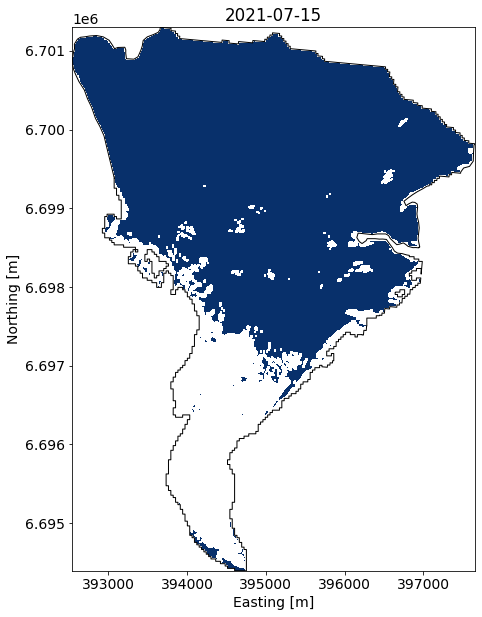

/Users/raineyaberle/opt/anaconda3/envs/skysat_stereo/planet-snow/lib/python3.8/site-packages/earthpy/spatial.py:105: RuntimeWarning: invalid value encountered in true_divide
  n_diff = (b1 - b2) / (b1 + b2)


Area of snow =  1332.8694  km^2


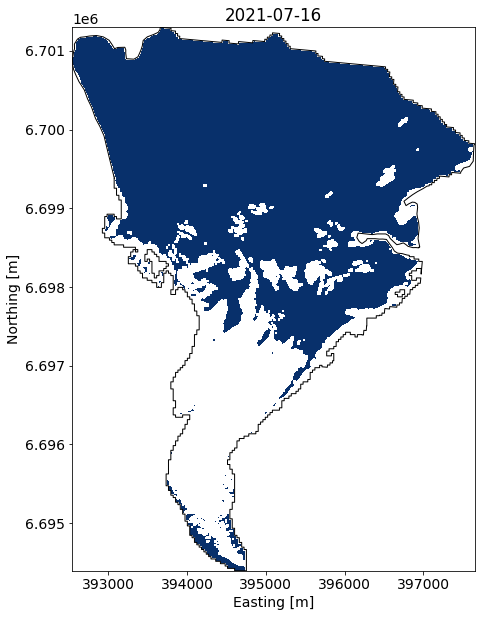

/Users/raineyaberle/opt/anaconda3/envs/skysat_stereo/planet-snow/lib/python3.8/site-packages/earthpy/spatial.py:105: RuntimeWarning: invalid value encountered in true_divide
  n_diff = (b1 - b2) / (b1 + b2)


Area of snow =  1294.7355  km^2


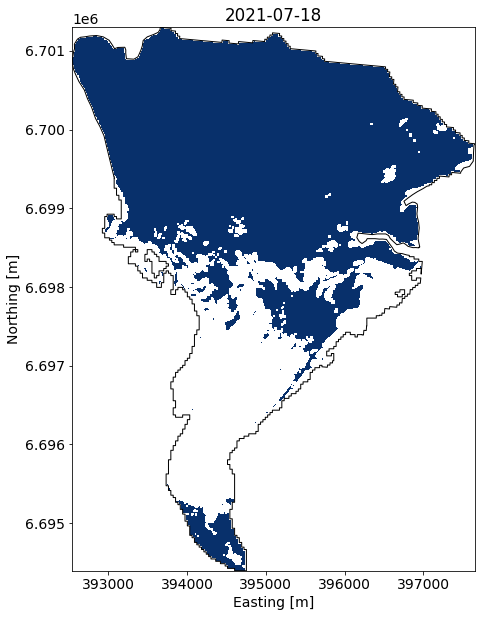

/Users/raineyaberle/opt/anaconda3/envs/skysat_stereo/planet-snow/lib/python3.8/site-packages/earthpy/spatial.py:105: RuntimeWarning: invalid value encountered in true_divide
  n_diff = (b1 - b2) / (b1 + b2)


Area of snow =  1228.2336  km^2


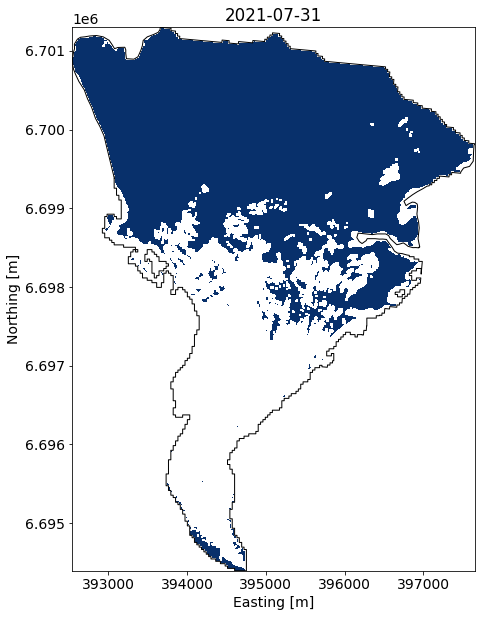

/Users/raineyaberle/opt/anaconda3/envs/skysat_stereo/planet-snow/lib/python3.8/site-packages/earthpy/spatial.py:105: RuntimeWarning: invalid value encountered in true_divide
  n_diff = (b1 - b2) / (b1 + b2)


Area of snow =  1115.5806  km^2


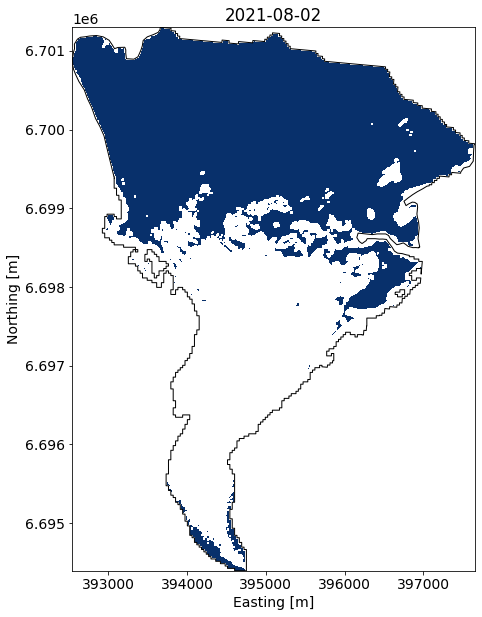

/Users/raineyaberle/opt/anaconda3/envs/skysat_stereo/planet-snow/lib/python3.8/site-packages/earthpy/spatial.py:105: RuntimeWarning: invalid value encountered in true_divide
  n_diff = (b1 - b2) / (b1 + b2)


Area of snow =  928.5111  km^2


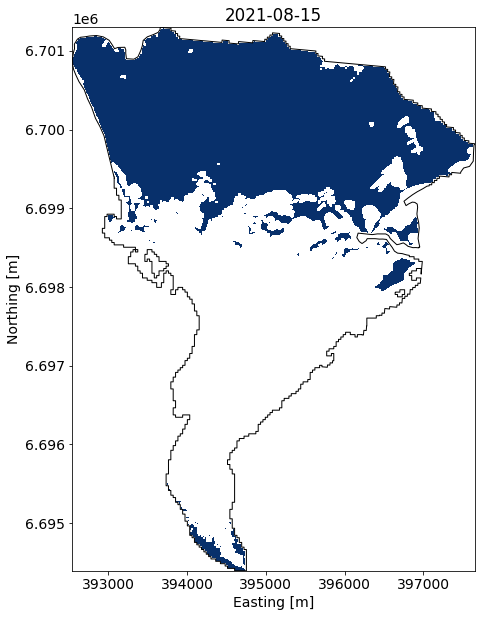

/Users/raineyaberle/opt/anaconda3/envs/skysat_stereo/planet-snow/lib/python3.8/site-packages/earthpy/spatial.py:105: RuntimeWarning: invalid value encountered in true_divide
  n_diff = (b1 - b2) / (b1 + b2)


Area of snow =  1013.5332  km^2


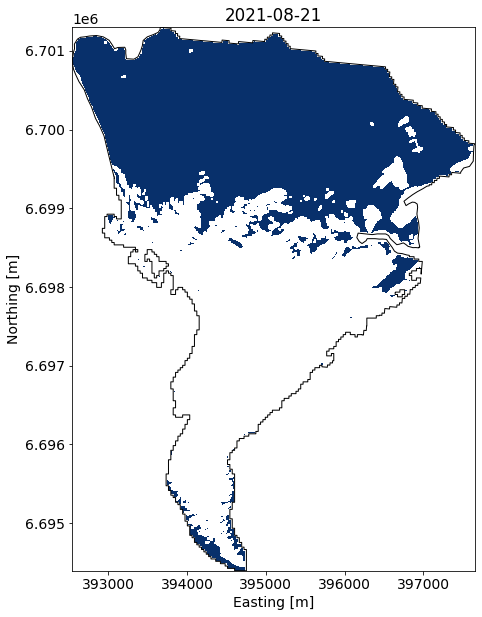

In [9]:
### Calculate MNDSI and Snow-Covered Area ###

# function to calculate MNDSI
def calculate_mndsi(nir,red):
    mndsi = es.normalized_diff(nir, red)
    return mndsi

# grab cropped image names
im_names_crop = glob.glob('*_crop.tif')
im_names_crop.sort() # sort file names by date

# loop through cropped images
dates=[]
snow_areas=[]
for im_name in im_names_crop:
    
    # open image
    im = rio.open(im_name)

    # extract date from image name
    date = im_name[0:4] + '-' + im_name[4:6] + '-' + im_name[6:8]
    dates = dates + [np.datetime64(date)]

    # calculate area of snow 
    # define bands, convert to TOA reflectance
    red = im.read(3)
    nir = im.read(4)
    # compute MNDSI
    mndsi = calculate_mndsi(nir,red) 
    
    # threshold MNDSI to determine snow cover
    thresh = 5.6
    snow = np.where(mndsi<thresh,1,np.nan)
    #snow_mask = rio.mask.mask(snow,AOI,crop=True)
    
    # calculate total area of snow
    pA = im.res[0]*im.res[1] # pixel area [m^2]
    snow_count = np.count_nonzero(~np.isnan(snow)) # number of snow pixels
    snow_area = pA * snow_count /10e3 # area of snow [km^2]
    snow_areas = snow_areas + [snow_area]
    print('Area of snow = ',snow_area,' km^2')
    
    # plot 
    fig, ax1 = plt.subplots(1,1,figsize=(10,10))
    plt.rc('font', size=14) 
    ax1.set_title(date)
    ax1.set_xlabel('Easting [m]')
    ax1.set_ylabel('Northing [m]')
    #show(mndsi, transform=im.transform, cmap='Purples', clim=(0,1), ax=ax1)
    show(snow, transform=im.transform, cmap='Blues', clim=(0,1), ax=ax1)
    AOI.plot(ax=ax1,facecolor='none',edgecolor='black')
    plt.show()
    
    # save image
    fig.savefig(outpath+date+'_snow-covered-area.png')

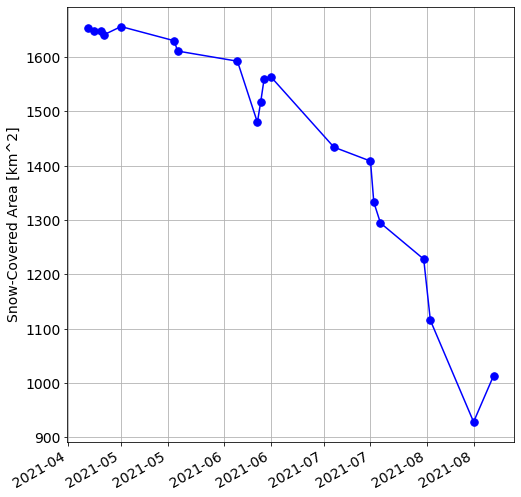

In [10]:
# plot snow-covered area by date
fig, ax = plt.subplots(1,1,figsize=(8,8))
plt.rc('font', size=14) 
plt.plot(dates,snow_areas,'.-b',markersize=15)
plt.grid()
plt.ylabel('Snow-Covered Area [km^2]')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
# Rotate and right-align the x-tick labels
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')
plt.show()

# save figure
fig.savefig(outpath+str(np.min(dates))+'_'+str(np.max(dates))+'_snow-covered-area.png') 